<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20E/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Continuity: an idea that talks about how smooth functions are. There exists an expression that must be true at a given point on a given function for that function to be considered "continuous" at that point. For a function to be considered "continuous" as a whole, this expression must be true at every point on the function.

This expression is as follows:
For a given e, there exists d such that if |x1 - x2| < d then |f(x1) - f(x2)| < e.
Put more simply, this means that we can find an upper bound for the distance between two points on the x-axis if their distance on the y-axis is less than some value we pick. However, we can pick whatever e we want, and force d to get smaller and smaller, and then force f to appear to have higher and higher resolution.

An alternative definition comes from limits:
f is continuous iff lim(x -> x1) f(x) = f(x1)

Differentiation: This one is a little more straight forward. It is best explained as caculating the slope at a single point, and not the slope between two points.

The formal definition is as follows:
(d/dx)f(x) = lim(h -> 0) ((f(x + h) - f(x)) / h)

h gets smaller and smaller until it it isn't there and we are left with the slope at a certain point.

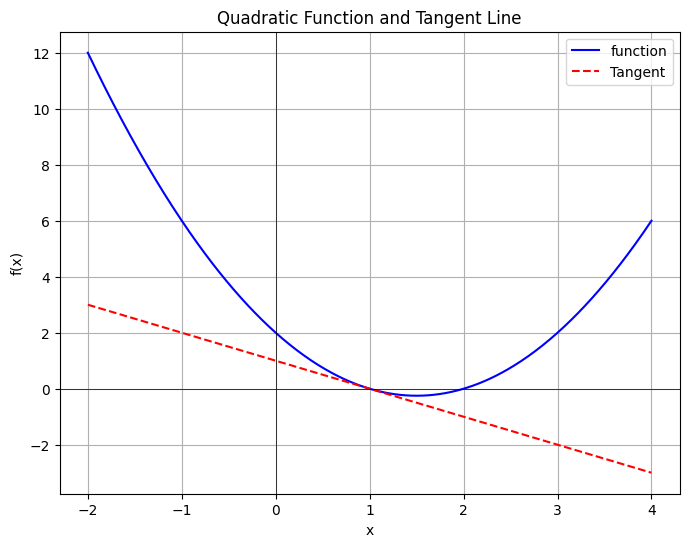

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    a, b, c = 1, -3, 2
    return a*x**2 + b*x + c


def df(x):
    a, b, c = 1, -3, 2
    return 2*a*x + b


def line(slope, intercept, x):
    return slope * x + intercept


if __name__ == "__main__":
    x0 = 1
    slope = df(x0)

    y0 = f(x0)
    intercept = y0 - slope * x0

    x_values = np.linspace(-2, 4, 400)
    y_values = f(x_values)
    tangent_values = line(slope, intercept, x_values)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label="function", color='blue')
    plt.plot(x_values, tangent_values, label="Tangent", linestyle='dashed', color='red')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Quadratic Function and Tangent Line')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()


Taylor's Theorem: this is used to approximate functions about a given point. It works by creating a series of derivatives, each of which matches the derivative of the original function. The accuracy is then determined by how many terms in the series are included. For polynomials, it is very possible to include all the terms and get an exact answer. However, this method can also be incredibly useful for approximating other functions with infinite derivatives, such as sine and cosine. This is how computers approximate such functions.

The definition of the nth term in a Taylor series centered around x = a is:
(f^n(x-a) * (x-a)^) / (n!)

You can see below that the functions with more terms only get more and more accurate.

<ipython-input-2-cb91d7257529>:28: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  f = lambda x, n=n, derivative=derivative: (derivative(a) * (x - a)**n) / (np.math.factorial(n))


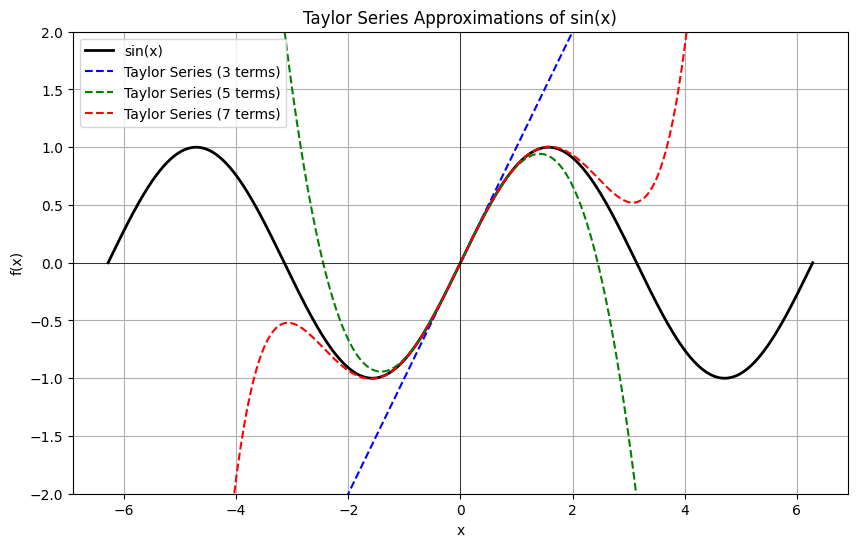

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def trig_diffentiate_sin(diff_num: int):
    diff_num %= 4
    if diff_num == 0: # derivatice of -cos is sin
        return lambda x: np.sin(x)
    elif diff_num == 1: # derivative of sin is cos
        return lambda x: np.cos(x)
    elif diff_num == 2: # derivative of cos is -sin
        return lambda x: -np.sin(x)
    else: # derivative of -sin is -cos
        return lambda x: -np.cos(x)


def compute_value(termList, x):
    total = 0
    for term in termList:
        total += term(x)
    return total


def taylor_sin(n_terms, a):
    termList = []
    for n in range(n_terms):
        derivative = trig_diffentiate_sin(n)
        f = lambda x, n=n, derivative=derivative: (derivative(a) * (x - a)**n) / (np.math.factorial(n))
        termList.append(f)

    return lambda x: compute_value(termList, x)


if __name__ == "__main__":
    x_values = np.linspace(-2*np.pi, 2*np.pi, 400)

    taylor_3 = taylor_sin(3, 0)  # 3 terms total
    taylor_5 = taylor_sin(5, 0)  # 5 terms total
    taylor_7 = taylor_sin(7, 0)  # 7 terms total

    true_values = np.sin(x_values)
    taylor_3_values = taylor_3(x_values)
    taylor_5_values = taylor_5(x_values)
    taylor_7_values = taylor_7(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, true_values, label='sin(x)', color='black', linewidth=2)
    plt.plot(x_values, taylor_3_values, label='Taylor Series (3 terms)', linestyle='dashed', color='blue')
    plt.plot(x_values, taylor_5_values, label='Taylor Series (5 terms)', linestyle='dashed', color='green')
    plt.plot(x_values, taylor_7_values, label='Taylor Series (7 terms)', linestyle='dashed', color='red')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Taylor Series Approximations of sin(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.ylim(-2, 2)

    plt.show()


Optimization with Gradient Descent: this is the method of finding local extrema by evaulating the derivative (or gradient) at an initial position x0, and then computing x+1 by taking a small step towards or away from, for maxima or minima respectively. The size of the step you take is determined by the magnitude of the gradient at your current position.

The update function looks like this:
x_(i+1) = x_i - n * f'(x_i)
where n is the learning rate

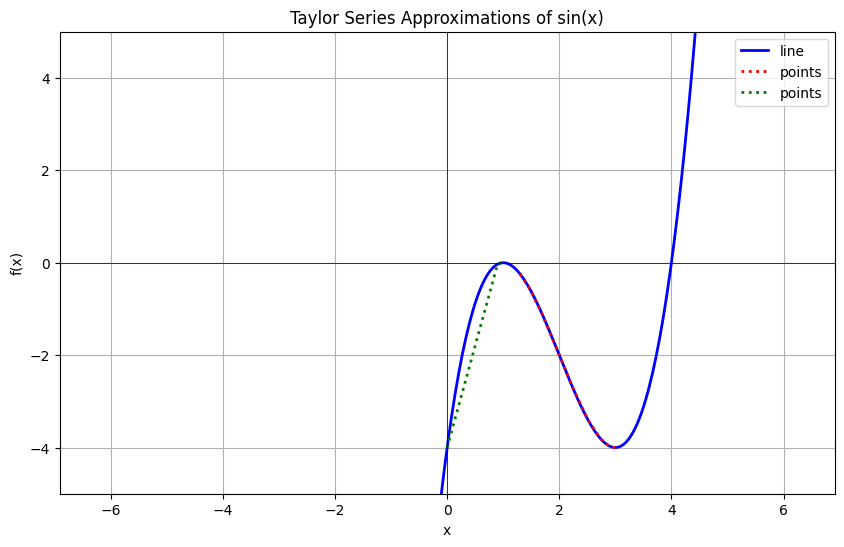

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def findExtrema(derivative, x0, learning_rate = .1, num_iterations: int = 100, seekMin: bool = True):
    if not seekMin: learning_rate *= -1
    point_list = [x0]
    for n in range(num_iterations):
        x_new = x0 - learning_rate * derivative(x0)
        x0 = x_new
        point_list.append(x_new)
    return point_list


if __name__ == "__main__":

    function = lambda x: (x-1) * (x-1) * (x-4)
    derivative = lambda x: (function(x + .001) - function(x - .001)) / .002

    x_values_min = findExtrema(derivative, 1.3)
    y_values_min = []
    for x in x_values_min:
        y_values_min.append(function(x))

    x_values_max = findExtrema(derivative, 0, seekMin=False)
    y_values_max = []
    for x in x_values_max:
        y_values_max.append(function(x))

    x_space = np.linspace(-2*np.pi, 2*np.pi, 400)
    y_func = []
    for x in x_space:
        y_func.append(function(x))

    plt.figure(figsize=(10, 6))
    plt.plot(x_space, y_func, label='line', color='blue', linewidth=2)
    plt.plot(x_values_min, y_values_min, label='points', color='red', linestyle="dotted", linewidth=2)
    plt.plot(x_values_max, y_values_max, label='points', color='green', linestyle="dotted", linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Taylor Series Approximations of sin(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.ylim(-5, 5)

    plt.show()
